# Biodiversity in National Parks
This is a project from CodeCademy's 'Data Scientist' Pathway, and is the 'Data Analysis Porfolio Project' capstone. Please see below for a brief, project description:
> For this project, you will interpret data from the National Parks Service about endangered species in different parks.
>
> You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.
>
> After you perform your analysis, you will share your findings about the National Park Service.

## Overview
In this project, we will interpret data about endangered species in different parks, inspect and clean the data, and investigate any patterns or themes to the types of species that become endangered.

## Setup & EDA

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading data
species_info = pd.read_csv('biodiversity_starter/species_info.csv')
observations = pd.read_csv('biodiversity_starter/observations.csv')

### Inspecting & cleaning

#### `species_info`

In [3]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
for col in species_info.columns:
    display(col, species_info[col].value_counts())

'category'

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

'scientific_name'

Streptopelia decaocto                       3
Columba livia                               3
Castor canadensis                           3
Canis lupus                                 3
Hypochaeris radicata                        3
                                           ..
Agrostis elliottiana                        1
Festuca brachyphylla ssp. breviculmis       1
Erythronium umbilicatum ssp. umbilicatum    1
Bromus suksdorfii                           1
Cryptantha hispidula                        1
Name: scientific_name, Length: 5541, dtype: int64

'common_names'

Brachythecium Moss                                               7
Dicranum Moss                                                    7
Sphagnum                                                         6
Panic Grass                                                      6
Bryum Moss                                                       6
                                                                ..
Lark Bunting                                                     1
Mat Amaranth, Prostrate Amaranth, Prostrate Pigweed              1
False Spotted St. Johnswort                                      1
Dutch Clover, Ladino Clover, White Clover, White Dutch Clover    1
Purple Pitcherplant                                              1
Name: common_names, Length: 5504, dtype: int64

'conservation_status'

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

##### Missing
`conservation_status` is the only column with missing values but are difficult to impute as categories do not reflect those of the [IUCN Red List](https://www.iucnredlist.org/#:~:text=It%20divides%20species%20into%20nine,in%20the%20Wild%20and%20Extinct.). Also, would not be dropping those species, as their presence would likely be important in later analysis to indicate their existence in the habitat scope of the data. 

However, to ensure we visualise *all* values, we will replace missing values in `conservation_status` to 'None'.

In [6]:
species_info.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [7]:
species_info[species_info.isnull().any(axis=1)]

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [8]:
# replacing NaN with 'No Intervention' status
species_info.conservation_status = species_info.conservation_status.fillna('No Intervention')

species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


##### Duplication

Initially, no duplication across all fields:

In [9]:
species_info[species_info.duplicated()]

,category,scientific_name,common_names,conservation_status


However, from above, there were multiple `scientific_name`s in the `.value_count()`, indicating potential duplication. Each row should be a unique species.

How to handle duplicates will depend on the nature of the duplicates.

**Category 1: duplicated names of species**

Where both the scientific and common names of a species are duplicated:

In [10]:
species_names_dup = species_info[species_info.duplicated(subset=['scientific_name', 'common_names'], keep=False)]\
                        .sort_values(['scientific_name', 'category'])

species_names_dup.scientific_name.value_counts()

Canis lupus            2
Oncorhynchus mykiss    2
Name: scientific_name, dtype: int64

In [11]:
species_names_dup

,category,scientific_name,common_names,conservation_status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,No Intervention
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


***Canis lupus***

As of 4 Jan 2021, the Fish and Wildlife Service ruled that *Canis lupus* is not classified as threatened or endangered, but the Mexican wolf subspecies (*Canis lupus baileyi*) is endangered ([Source](https://www.federalregister.gov/documents/2020/11/03/2020-24171/endangered-and-threatened-wildlife-and-plants-removing-the-gray-wolf-canis-lupus-from-the-list-of)). This likely explains the two separate entries for *Canis lupus*, with difference `conservation_status` values.

Because each row is a species, and [a subspecies cannot be recognised independently](https://en.wikipedia.org/wiki/Subspecies#Nominotypical_subspecies_and_subspecies_autonyms), we should not add subspecies suffixes to `scientific_name` to distinguish. Instead, we will add further `common_names`:

In [12]:
# creating cleaned `species_info` df
species_info_cleaned = species_info

species_info_cleaned.at[4448,'common_names'] = 'Mexican Wolf, Lobo'

species_info_cleaned[species_info_cleaned.scientific_name=='Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Mexican Wolf, Lobo",Endangered


From above, we will also drop the *Canis lupus* entry at index 8:

In [13]:
species_info_cleaned = species_info_cleaned.drop(8)

species_info_cleaned[species_info_cleaned.scientific_name=='Canis lupus']

,category,scientific_name,common_names,conservation_status
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Mexican Wolf, Lobo",Endangered


***Oncorhynchus mykiss***

As of 17 Feb 2022, the [NOAA Fisheries](https://www.fisheries.noaa.gov//species/steelhead-trout#overview) (US Dept of Commerce) has listed one distinct population segment ('DPS') (the 'Southern California DPS') as endangered, and 10 DPS and 1 experimental, non-essential population as threatened. This likely explains the duplication.

Similarly to above, DPS suffixes should not be added to `scientific_name`. To distinguish between the two rows, we will:
1. Update the `common_names`, and
2. Update the `conservation_status`

In [14]:
species_info_cleaned[species_info_cleaned.scientific_name=='Oncorhynchus mykiss']

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,No Intervention
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


In [15]:
species_info_cleaned.at[560,'common_names'] = 'Southern California Steelhead'
species_info_cleaned.at[560,'conservation_status'] = 'Endangered'
species_info_cleaned.at[3283, 'common_names'] = 'Rainbow Trout, Steelhead Trout, Redband Trout'

species_info_cleaned[species_info_cleaned.scientific_name=='Oncorhynchus mykiss']

,category,scientific_name,common_names,conservation_status
560,Fish,Oncorhynchus mykiss,Southern California Steelhead,Endangered
3283,Fish,Oncorhynchus mykiss,"Rainbow Trout, Steelhead Trout, Redband Trout",Threatened


**Category 2: same scientific name and conservation status**

If the species has the same scientific name and conservation status, it likely means there are subspecies of other subdivisions of the species. However, because the scope of the analysis will be on the `conservation_status`, we can drop these duplicates as those subdivisions are unlikely material.

In [16]:
species_scinames_dup = species_info_cleaned[species_info_cleaned\
                                            .duplicated(subset=['scientific_name', 'conservation_status'],
                                                                            keep=False)]\
                        .sort_values('scientific_name')


# species_scinames_dup.scientific_name.unique()
species_scinames_dup

,category,scientific_name,common_names,conservation_status
5553,Vascular Plant,Agrostis capillaris,"Colonial Bent, Colonial Bentgrass",No Intervention
2132,Vascular Plant,Agrostis capillaris,Rhode Island Bent,No Intervention
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",No Intervention
2134,Vascular Plant,Agrostis gigantea,Redtop,No Intervention
4178,Vascular Plant,Agrostis mertensii,"Arctic Bentgrass, Northern Bentgrass",No Intervention
...,...,...,...,...
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",No Intervention
4290,Vascular Plant,Vulpia octoflora,"Eight-Flower Six-Weeks Grass, Pullout Grass, S...",No Intervention
2331,Vascular Plant,Vulpia octoflora,Annual Fescue,No Intervention
632,Vascular Plant,Zizia aptera,Golden Alexanders,No Intervention


In [17]:
species_info_cleaned = species_info_cleaned\
                        .drop_duplicates(subset=['scientific_name', 'conservation_status'])

# species_info_cleaned.shape
species_info_cleaned[species_info_cleaned\
                     .duplicated(subset=['scientific_name', 'conservation_status'],
                                 keep=False)]

,category,scientific_name,common_names,conservation_status


#### Ordering `conservation_status`

In [18]:
species_info_cleaned['conservation_status'] = pd.Categorical(species_info_cleaned['conservation_status'],
                                                             ['Endangered', 'Threatened', 'Species of Concern',
                                                              'In Recovery', 'No Intervention'], ordered=True)

species_info_cleaned.conservation_status.unique()

['No Intervention', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
Categories (5, object): ['Endangered' < 'Threatened' < 'Species of Concern' < 'In Recovery' < 'No Intervention']

#### `observations` DataFrame

In [19]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [20]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [21]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [22]:
observations.scientific_name.value_counts()

Procyon lotor                            12
Puma concolor                            12
Holcus lanatus                           12
Streptopelia decaocto                    12
Columba livia                            12
                                         ..
Festuca brachyphylla ssp. breviculmis     4
Arabis laevigata var. burkii              4
Prosopium williamsoni                     4
Bromus suksdorfii                         4
Cryptantha hispidula                      4
Name: scientific_name, Length: 5541, dtype: int64

In [23]:
observations.park_name.value_counts()

Yosemite National Park                 5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Bryce National Park                    5824
Name: park_name, dtype: int64

##### Missing
There are no missing values.

In [24]:
observations.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

##### Duplicates
For a given park, some species had multiple observations. 1060 species were observed twice at the same park, and 36 were observed thrice at the same park (21,068 species were only observed once at the same park). 

It is possible that these observations were taken at different times, under different conditions. From the `species_info` dataset, it is also possible that the same scientific name refers to different subspecies. However, these attributes are difficult to impute. 

Instead, we can consider all `observations` by taking the mean of each species, at each park.

In [25]:
# showing all duplicated rows where the same species, at the same park, was observed on multiple occasions
observations_dup = observations[observations.duplicated(subset=['scientific_name', 'park_name'], keep=False)]\
                        .sort_values(['scientific_name', 'park_name'])

observations_dup

,scientific_name,park_name,observations
3993,Agrostis capillaris,Bryce National Park,103
4864,Agrostis capillaris,Bryce National Park,105
792,Agrostis capillaris,Great Smoky Mountains National Park,84
17428,Agrostis capillaris,Great Smoky Mountains National Park,97
6166,Agrostis capillaris,Yellowstone National Park,241
...,...,...,...
11138,Zizia aptera,Great Smoky Mountains National Park,41
6963,Zizia aptera,Yellowstone National Park,257
17162,Zizia aptera,Yellowstone National Park,269
8445,Zizia aptera,Yosemite National Park,123


In [26]:
# for the species observed at the same park, multiple times, finding out the number of times they were observed:
observations_dup_count = observations.groupby(['scientific_name', 'park_name']).count()

# observations_dup_count[observations_dup_count.observations!=2]
observations_dup_count.observations.value_counts()

1    21068
2     1060
3       36
Name: observations, dtype: int64

In [27]:
# taking the mean observations for each species, at each park
observations_summarised = observations\
                            .groupby(['scientific_name', 'park_name']).observations.mean()\
                            .reset_index()\
                            .rename({'observations': 'mean_observations'}, axis='columns') # renaming column

observations_summarised

,scientific_name,park_name,mean_observations
0,Abies bifolia,Bryce National Park,109.0
1,Abies bifolia,Great Smoky Mountains National Park,72.0
2,Abies bifolia,Yellowstone National Park,215.0
3,Abies bifolia,Yosemite National Park,136.0
4,Abies concolor,Bryce National Park,83.0
...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159.0
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102.0
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102.0
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237.0


## Exploring Data

### Which categories of species have the highest number of species in 'endangered' status?
From below, mammals have the highest number of distinct species that are 'endangered'. This is followed by fish and birds. However, although not endangered, birds have the highest number of species that are of concern. 

In [28]:
# creating Dataframe counting conservation status
species_count_df = species_info_cleaned.groupby(['category', 'conservation_status'])\
                    .size()\
                    .reset_index()\
                    .pivot(columns='conservation_status', index='category', values=0)

# changing order of columns
# species_count_df = species_count_df[['Endangered', 'Threatened', 'Species of Concern', 'In Recovery', 'N']]

# changing order of rows (### ADD TO NOTES)
species_count_df = species_count_df.reindex([
                    'Amphibian', 'Bird', 'Fish', 'Mammal', 'Reptile', 'Nonvascular Plant', 'Vascular Plant'])

# replacing np.NaN with 0.0
species_count_df = species_count_df.fillna(0)


species_count_df

conservation_status,Endangered,Threatened,Species of Concern,In Recovery,No Intervention
category,,,,,
Amphibian,1,2,4,0,72
Bird,4,0,68,3,413
Fish,4,4,4,0,114
Mammal,6,2,22,1,146
Reptile,0,0,5,0,73
Nonvascular Plant,0,0,5,0,328
Vascular Plant,1,2,43,0,4216


In [29]:
species_count_nonone = species_count_df.drop(columns='No Intervention')

species_count_nonone

conservation_status,Endangered,Threatened,Species of Concern,In Recovery
category,,,,
Amphibian,1,2,4,0
Bird,4,0,68,3
Fish,4,4,4,0
Mammal,6,2,22,1
Reptile,0,0,5,0
Nonvascular Plant,0,0,5,0
Vascular Plant,1,2,43,0


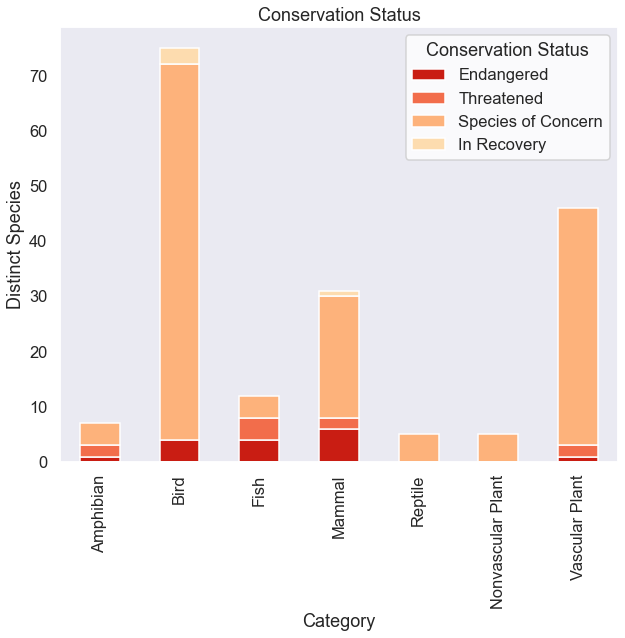

<Figure size 432x288 with 0 Axes>

In [30]:
# styling
sns.set_style('dark')
sns.set_palette('bright')
sns.set_context('talk')

colors = sns.color_palette('OrRd_r', 4) ### ADDING _r suffix REVERSES THE ORDER -- ADD TO NOTES!

# plotting
### ADD TO NOTES!
species_stackedbar = species_count_nonone.plot(kind='bar', stacked=True, figsize=(10,8), color=colors)
# sns.despine()

# editing legend
### NEED TO ADD THE FOLLOWING TO NOTES! https://www.dataforeverybody.com/seaborn-legend-change-location-size/
species_stackedbar.legend(title='Conservation Status', facecolor='white')

# labelling
species_stackedbar.set(xlabel='Category', ylabel='Distinct Species', title='Conservation Status') ### ADD TO NOTES!
# plt.xticks(rotation=90)

plt.show()
plt.clf()


### MIGHT NOT BE THE BEST AS DOES NOT INCORPORATE THE "NONE'S", BUT IF FOCUS IS SOLELY ON ENDANGERED, THIS MIGHT BE OKAY?

In [31]:
# # styling
# sns.set_style('whitegrid')
# sns.set_palette('bright')

# # plotting
# ax = plt.subplots(figsize=(9,7))
# cat_count = sns.countplot(x='category', hue='conservation_status', data=species_info_cleaned)

# # labelling
# cat_count.set(xlabel='Category', ylabel='Count of Species', title='Conservation Status')
# plt.xticks(rotation=90)

# # editing legend
# ### NEED TO ADD THE FOLLOWING TO NOTES! https://www.dataforeverybody.com/seaborn-legend-change-location-size/
# cat_count.legend(loc='upper right',\
#                 title='Conservation Status')

# plt.show()
# plt.clf()

In [32]:
# # SINGLE DONUT CHART for endangered animals (split by categories)
# NOT GOING TO USE THIS CHART EITHER BECAUSE THE % OF TOTAL SPECIES THAT ARE ENDANGERED PER GROUP IS NOT VERY HELPFUL

# f, ax = plt.subplots(figsize=(20,8))

# ax = plt.pie(species_count_df.Endangered,
#              autopct='%d%%')
# my_circle = plt.Circle((0,0), 0.7, color='white')
# p = plt.gcf()
# p.gca().add_artist(my_circle)

# plt.title('Endangered Species Categories')


# plt.legend(species_count_df.index, loc='upper right')


# plt.show()
# plt.clf()

In [33]:
# # swap columns and rows for `species_count_df`

# species_count_status_rows = species_count_df.transpose()

# species_count_status_rows

In [34]:
### Turns out I won't use this because too many species in each category is "None"


### ADD TO NOTES REGARDLESS!

# plt.figure(figsize=(20,8))
# plt.suptitle('Conservation Status per Species')

# # loop through to chart donut charts for each species [##ADD TO NOTES!!]
# for n, col in enumerate(species_count_status_rows.columns):
#     # iteratively add new subplot
#     ax = plt.subplot(2, 4, n+1)
    
#     # filter df by each col
#     temp_array = species_count_status_rows[col]
    
#     # plotting donut chart
#     plt.pie(temp_array, autopct='%d%%')
#     my_circle = plt.Circle((0,0), 0.7, color='white')
#     p = plt.gcf()
#     p.gca().add_artist(my_circle)
    

# ### NEED TO FIX LOCATION!    
# plt.legend(temp_array.index, loc='lower right')

# plt.show()

In [35]:
# visualise as side-by-side donut charts, with each category per donut (incl the Nones)
# label each segment as the total count

# # create subplots
# fig, axes = plt.subplots(2,4, figsize=(20,8))


# for f in range(species_count_df.shape[0]):
#     plt.figure(f) # plotting multiple figures
    
#     labels = list(species_count_df.index)
#     temp_array = species_count_df.iloc[:, f]
    
#     # plot pie chart
#     plt.pie(temp_array, labels=labels)
    
#     # convert to donut chart
#     my_circle = plt.Circle((0,0), 0.7, color='white')
#     p = plt.gcf()
#     p.gca().add_artist(my_circle)


# delete axes that I don't need
# fig.delaxes(axes[2,1])

# plt.show()

### Observations per Park
From below, Great Smoky Mountains National Park has the lowest median observations, across all species observed. Contrarily, Yellowstone Park had a highest median number of species observations, but also the largest range.

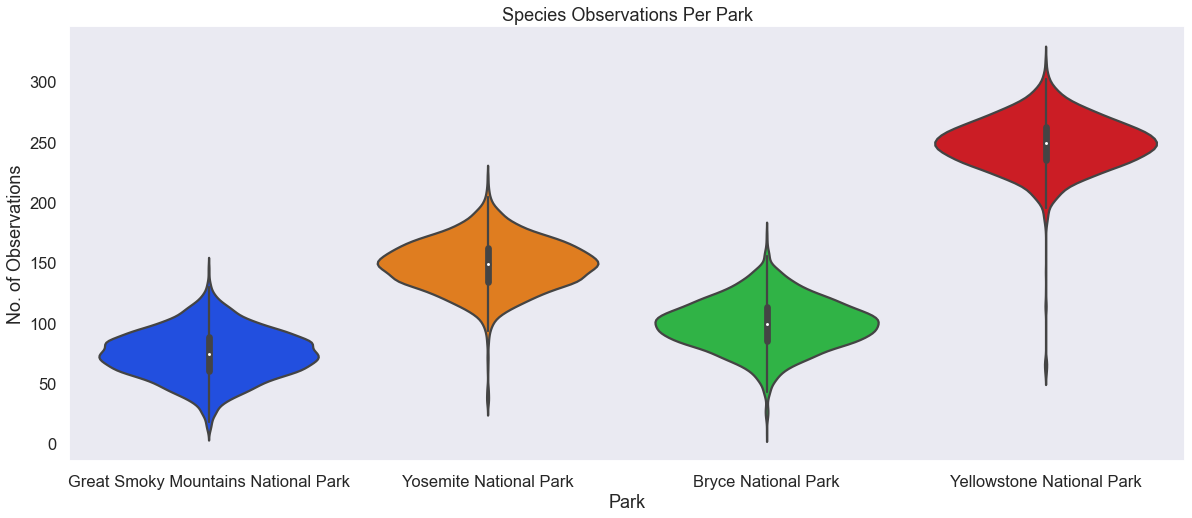

In [36]:
plt.figure(figsize=(20,8))

park_violin = sns.violinplot(data=observations, x='park_name', y='observations')
park_violin.set(title='Species Observations Per Park', xlabel='Park', ylabel='No. of Observations')

plt.show()

### Observation Numbers & Status

In [37]:
merge_df = pd.merge(
                species_info_cleaned,
                observations_summarised,
                how='outer')\
             .sort_values(['conservation_status'])

# merge_df.isna().sum() # output: no missing values, indicating all values were considered

merge_df.head()

,category,scientific_name,common_names,conservation_status,park_name,mean_observations
153,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,Great Smoky Mountains National Park,14.000000
133,Mammal,Myotis grisescens,Gray Myotis,Endangered,Great Smoky Mountains National Park,26.000000
2280,Fish,Noturus baileyi,Smoky Madtom,Endangered,Bryce National Park,22.000000
17076,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,Bryce National Park,22.000000
12077,Mammal,Canis lupus,"Mexican Wolf, Lobo",Endangered,Great Smoky Mountains National Park,19.666667


#### Relationship between Park and Conservation Status

<Figure size 576x720 with 0 Axes>

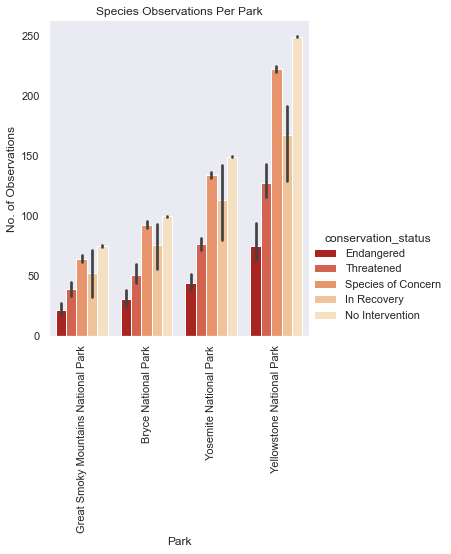

In [44]:
plt.figure(figsize=(8,10))

colors = sns.color_palette('OrRd_r', 5)
sns.set_context('notebook')

parkstatus = sns.catplot(data=merge_df, 
                         x='park_name', 
                         y='mean_observations', 
                         kind='bar', 
                         hue='conservation_status',
                        palette=colors)

parkstatus.set(title='Species Observations Per Park', xlabel='Park', ylabel='No. of Observations')
plt.xticks(rotation=90)

plt.show()